
## Assigment 5
Name: Saxam Rawat <br>
RegNo:21BCG10087 <br>
VIT Email: saxamrawat2021@vitbhopal.ac.in

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#importing and loading dataset
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#describing data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
#checking for null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

array([[<Axes: title={'center': 'Annual Income (k$)'}>]], dtype=object)

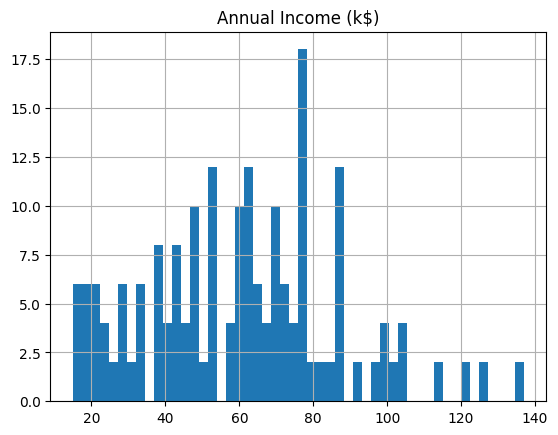

In [5]:
#visualizing data
data.hist(column='Annual Income (k$)', bins=50)

In [6]:
#Encoding Spending Score(1 to 5)
bins = [0, 20, 40, 60, 80, 100]
labels = [1, 2, 3, 4, 5]
data['Spending Score (1-100)'] = pd.cut(data['Spending Score (1-100)'], bins=bins, labels=labels)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,2
1,2,Male,21,15,5
2,3,Female,20,16,1
3,4,Female,23,16,4
4,5,Female,31,17,2


In [7]:
# Label Encoding Gender
label_encoder = LabelEncoder()
data['Gender_Encoded'] = label_encoder.fit_transform(data['Gender'])

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Encoded
0,1,Male,19,15,2,1
1,2,Male,21,15,5,1
2,3,Female,20,16,1,0
3,4,Female,23,16,4,0
4,5,Female,31,17,2,0


In [9]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Gender_Encoded'],
      dtype='object')

In [10]:
# dividing into X and y
X = data[['CustomerID', 'Gender_Encoded', 'Age', 'Annual Income (k$)']].values
X[0:5]

array([[ 1,  1, 19, 15],
       [ 2,  1, 21, 15],
       [ 3,  0, 20, 16],
       [ 4,  0, 23, 16],
       [ 5,  0, 31, 17]])

In [11]:
y = data['Spending Score (1-100)'].values
y[0:5]

[2, 5, 1, 4, 2]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [12]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 4) (160,)
Test set: (40, 4) (40,)


In [13]:
#normalizing data
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0:5]

array([[-1.25134042, -0.90453403,  0.37439436, -1.22782926],
       [ 0.64094648,  1.1055416 , -1.40631604,  0.5213537 ],
       [ 1.44692053, -0.90453403, -0.19543297,  1.45425128],
       [ 1.06145468,  1.1055416 , -0.40911822,  0.71570736],
       [ 1.60461111, -0.90453403, -0.26666138,  1.68747568]])

In [14]:
# normalizing X_test
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[-1.62508743, -0.81649658, -0.02131851, -1.64255323],
       [-0.14811667,  1.22474487, -1.18414633, -0.12468226],
       [ 0.33861233,  1.22474487,  1.839206  ,  0.23671559],
       [ 1.12744899, -0.81649658, -0.40892778,  0.85109194],
       [-1.79292502,  1.22474487, -1.10662448, -1.78711237]])

In [15]:
# building model and checking accuracy for k = 1 to k = 10

Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_train)
    yhat=neigh.predict(X_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.45 , 0.425, 0.425, 0.5  , 0.45 , 0.425, 0.45 , 0.475, 0.475,
       0.4  ])

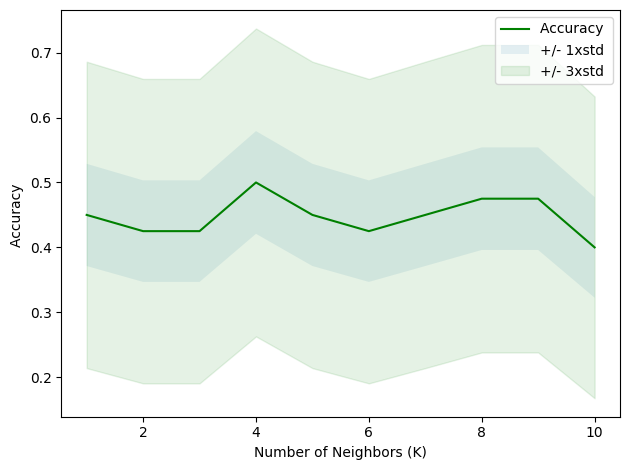

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## End of Assignment